<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Reproducible Papers - Syngine Paper</div>
        </div>
    </div>
</div>

---

# Figure 4: Earth Models

This notebook is part of the supplementary materials for the Syngine paper and reproduces figure 4.

This notebook plots the used Earth models. Requires matplotlib >= 1.5, pandas and a couple of other things.

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))

In [1]:
%matplotlib inline

import numpy as np
import itertools
import pandas
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import matplotlib.gridspec as gridspec

import requests

In [2]:
def get_model(url):
    data = requests.get(url).text
    d = []
    for line in data.splitlines():
        line = line.strip()
        if not line or line.startswith("#"):
            continue
        line = line.split()
        if len(line) != 6:
            continue
        line = [float(_i) for _i in line]
        d.append({"depth": (6371000. - line[0]) / 1000.0,
                  "v_p": line[2] / 1000.0,
                  "v_s": line[3] / 1000.0,
                  "rho": line[2] / 1000.0})
    return pandas.DataFrame(d)

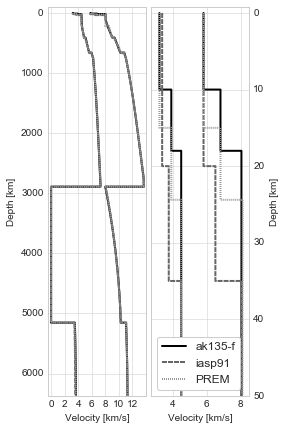

In [3]:
ak135f = get_model("http://ds.iris.edu/media/product/emc-syngine/files/1dmodel_ak135f.txt")
prem = get_model("http://ds.iris.edu/media/product/emc-syngine/files/1dmodel_PREMiso.txt")
iasp91 = get_model("http://ds.iris.edu/media/product/emc-syngine/files/1dmodel_iasp91.txt")

fig = plt.figure(figsize=(4, 6))




gs1 = gridspec.GridSpec(1, 2, wspace=.05, hspace=0.05, left=0.15, right=0.85, bottom=0.08, top=0.98)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

plt.sca(ax1)

plt.plot(ak135f.v_p, ak135f.depth, color="0.0", ls="-", lw=2, label="ak135-F")
plt.plot(ak135f.v_s, ak135f.depth, color="0.0", ls="-", lw=2, label="_nolegend_")

l = plt.plot(iasp91.v_p, iasp91.depth, color="0.4", ls="--", lw=2, label="iasp91")
l[0].set_dashes([5, 1])
l = plt.plot(iasp91.v_s, iasp91.depth, color="0.4", ls="--", lw=2, label="_nolegend_")
l[0].set_dashes([5, 1])

l = plt.plot(prem.v_p, prem.depth, color="0.6", ls=":", lw=2, label="PREM")
l[0].set_dashes([1, 1])
l = plt.plot(prem.v_s, prem.depth, color="0.6", ls=":", lw=2, label="_nolegend_")
l[0].set_dashes([1, 1])

plt.ylabel("Depth [km]")
plt.xlabel("Velocity [km/s]")
plt.xticks([0, 2, 4, 6, 8, 10, 12])
plt.ylim(-100, 6371)
plt.xlim(-0.5, 14)
plt.gca().invert_yaxis()

plt.sca(ax2)


plt.plot(ak135f.v_p, ak135f.depth, color="0.0", ls="-", lw=2, label="ak135-f")
plt.plot(ak135f.v_s, ak135f.depth, color="0.0", ls="-", lw=2, label="_nolegend_")

l = plt.plot(iasp91.v_p, iasp91.depth, color="0.4", ls="--", lw=2, label="iasp91")
l[0].set_dashes([5, 1])
l = plt.plot(iasp91.v_s, iasp91.depth, color="0.4", ls="--", lw=2, label="_nolegend_")
l[0].set_dashes([5, 1])

l = plt.plot(prem.v_p, prem.depth, color="0.6", ls=":", lw=2, label="PREM")
l[0].set_dashes([1, 1])
l = plt.plot(prem.v_s, prem.depth, color="0.6", ls=":", lw=2, label="_nolegend_")
l[0].set_dashes([1, 1])




ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

plt.ylabel("Depth [km]")
plt.xlabel("Velocity [km/s]")
plt.xticks([0, 2, 4, 6, 8])
plt.ylim(-.784806153, 50)
plt.xlim(2.7, 8.5)

plt.gca().invert_yaxis()

legend = plt.legend(loc="lower left", fancybox=True, frameon=True)

plt.savefig("earth_models.pdf")
plt.show()